In [104]:
import tensorflow as tf
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import tensorflow_hub as hub
import os

### Read the csv file

In [105]:
csv_path = "./a/Iemocap_audio/iemocap_audio/iemocapTrans.csv"

all_data = []


def f_read(csv_path):
    with open(csv_path, 'r') as rf:
        file_reader = csv.reader(rf)
        rows = [row for row in file_reader]
        for i in range(1, len(rows)):
            cur_label = rows[i][3]
            cur_file_name = rows[i][6]
            cur_text = rows[i][7]
            cur_row = [cur_label, cur_file_name, cur_text]
            all_data.append(cur_row)
f_read(csv_path)

In [106]:
length = len(all_data)
print("total num of all wav files: ", length)

left = 4500
right = 7500

total num of all wav files:  10039


In [118]:
chosen_emotions = {"ang", "exc", "fru", "hap", "neu", "sad"}

### Acoustic Feature Extraction

In [119]:
import librosa
from IPython.display import Audio
from scipy.io import wavfile
import scipy.signal

FRAME_LEN = 1024
HOP_LEN = 512
N_MFCC = 10
N_CHROMA = 10

def feature_extraction(fp):
    y, sr = librosa.load(fp)
    frames = librosa.util.frame(y, frame_length = FRAME_LEN, hop_length = HOP_LEN, axis = 0)
    
    mfcc_data = librosa.feature.mfcc(y = frames, sr = sr, n_mfcc = N_MFCC)
    mfcc_data = np.mean(mfcc_data, axis = 2)
    
    chroma_data = librosa.feature.chroma_stft(y = frames, sr = sr, n_chroma = N_CHROMA)
    chroma_data = np.mean(chroma_data, axis = 2)
    
    rms_data = librosa.feature.rms(y = frames)
    rms_data = np.mean(rms_data, axis = 2)
    
    res = np.concatenate((mfcc_data, chroma_data, rms_data), axis = 1)
    return res[0].reshape(1, N_MFCC + N_CHROMA + 1)


In [121]:
audio_path = "./a/Iemocap_audio/iemocap_audio/IEMOCAP_wav/"

audio_X = []
audio_y = []
for i in range(left, right):
    cur_label = all_data[i][0]
    if cur_label in chosen_emotions:
        audio_y.append(cur_label)
        cur_path = audio_path + all_data[i][1] + ".wav"
        cur_fv = feature_extraction(cur_path)

        if len(audio_X) == 0:
            audio_X = cur_fv
        else:
            audio_X = np.concatenate((audio_X, cur_fv), axis = 0)
        
        print(i)


4500
4501
4502
4504
4505
4506
4507
4508
4509
4510
4511
4512
4513
4514
4515
4516
4517
4518
4519
4520
4521
4522
4523
4524
4525
4526
4527
4528
4529
4530
4531
4532
4533
4534
4535
4536
4537
4538
4539
4540
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4551
4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700


6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6188
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6256
6257
6258
6259
6260
6261
6262
6263
6264
6265
6266
6267
6268
6269
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332
6333
6334
6335
6336
6337
6338
6339
6340
6341
6342
6343
6344
6345
6346
6347
6348
6349
6350
6351
6352
6353
6354
6355
6356
6357
6358
6359
6360
6361
6362
6363
6364
6365
6366
6367
6368
6369
6370
6371
6372
6373
6374
6375
6376
6377


In [122]:
audio_X = np.array(audio_X)
audio_y = np.array(audio_y)
print(audio_X.shape)
print(audio_y.shape)

(2936, 21)
(2936,)


In [123]:
audio_X_train, audio_X_test, audio_y_train, audio_y_test = train_test_split(audio_X, audio_y, test_size=0.3, random_state=0)

In [126]:
from sklearn import metrics
from sklearn.metrics import classification_report

def printReport(report):
    for key in report:
        print(key)
        print(report[key])
        print()
        

### Random Forest （Finally Chosen）

In [127]:
from sklearn.ensemble import RandomForestClassifier

def clf_rfc(X_train, X_test, y_train, y_test):
    rfc = RandomForestClassifier(n_estimators=100, random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    rfc_report = classification_report(y_test, y_pred, output_dict = True)
    printReport(rfc_report)
    return rfc, y_pred, y_test
audio_rfc, audio_yp, audio_yt = clf_rfc(audio_X_train, audio_X_test, audio_y_train, audio_y_test)

ang
{'precision': 0.3048780487804878, 'recall': 0.24271844660194175, 'f1-score': 0.2702702702702703, 'support': 103}

exc
{'precision': 0.25252525252525254, 'recall': 0.16447368421052633, 'f1-score': 0.19920318725099603, 'support': 152}

fru
{'precision': 0.3394495412844037, 'recall': 0.5627376425855514, 'f1-score': 0.42346208869814017, 'support': 263}

hap
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 58}

neu
{'precision': 0.352112676056338, 'recall': 0.25906735751295334, 'f1-score': 0.29850746268656714, 'support': 193}

sad
{'precision': 0.4380165289256198, 'recall': 0.4732142857142857, 'f1-score': 0.45493562231759654, 'support': 112}

accuracy
0.3416572077185017

macro avg
{'precision': 0.2811636745953503, 'recall': 0.2837019027708764, 'f1-score': 0.2743964385372617, 'support': 881}

weighted avg
{'precision': 0.3133678825023489, 'recall': 0.3416572077185017, 'f1-score': 0.3156095137635396, 'support': 881}



### Get the text

### Linguistic Feature Extraction

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer

def bagofwords_feature_extraction(text_list, num_features):
    tfidfv = TfidfVectorizer(
        decode_error = "ignore",
        analyzer = "word",
        stop_words = "english",
        smooth_idf = False,
        max_features = num_features,
    )
    x = np.array(text_list)
    x = tfidfv.fit_transform(x)
    x = x.toarray()
    return x

In [134]:
chosen_txt = []
for i in range(left, right):
    if all_data[i][0] in chosen_emotions:
        chosen_txt.append(all_data[i][2])
        
txt_X = bagofwords_feature_extraction(chosen_txt, 100)
txt_X = np.array(txt_X)
txt_y = np.array(audio_y)
print(txt_X.shape)
print(txt_y.shape)

(2936, 100)
(2936,)


In [136]:
txt_X_train, txt_X_test, txt_y_train, txt_y_test = train_test_split(txt_X, txt_y, test_size=0.3, random_state=0)


txt_rfc, txt_yp, txt_yt = clf_rfc(txt_X_train, txt_X_test, txt_y_train, txt_y_test)

ang
{'precision': 0.2972972972972973, 'recall': 0.21359223300970873, 'f1-score': 0.2485875706214689, 'support': 103}

exc
{'precision': 0.3684210526315789, 'recall': 0.27631578947368424, 'f1-score': 0.3157894736842105, 'support': 152}

fru
{'precision': 0.3471264367816092, 'recall': 0.5741444866920152, 'f1-score': 0.43266475644699137, 'support': 263}

hap
{'precision': 0.125, 'recall': 0.05172413793103448, 'f1-score': 0.07317073170731707, 'support': 58}

neu
{'precision': 0.33793103448275863, 'recall': 0.2538860103626943, 'f1-score': 0.2899408284023669, 'support': 193}

sad
{'precision': 0.2247191011235955, 'recall': 0.17857142857142858, 'f1-score': 0.1990049751243781, 'support': 112}

accuracy
0.3257661748013621

macro avg
{'precision': 0.28341582038613994, 'recall': 0.2580390143400943, 'f1-score': 0.2598597226644555, 'support': 881}

weighted avg
{'precision': 0.3127753728447219, 'recall': 0.3257661748013621, 'f1-score': 0.3063409651012277, 'support': 881}



### Combine two methods

In [137]:
combine_X = np.concatenate((audio_X, txt_X), axis = 1)
print(combine_X.shape)
combine_y = np.array(txt_y)
print(combine_y.shape)


(2936, 121)
(2936,)


In [138]:
combine_X_train, combine_X_test, combine_y_train, combine_y_test = train_test_split(combine_X, combine_y, test_size=0.3, random_state=0)


combine_rfc, combine_yp, combine_yt = clf_rfc(combine_X_train, combine_X_test, combine_y_train, combine_y_test)

ang
{'precision': 0.28, 'recall': 0.20388349514563106, 'f1-score': 0.23595505617977527, 'support': 103}

exc
{'precision': 0.2127659574468085, 'recall': 0.13157894736842105, 'f1-score': 0.16260162601626016, 'support': 152}

fru
{'precision': 0.3333333333333333, 'recall': 0.6007604562737643, 'f1-score': 0.42876526458616016, 'support': 263}

hap
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 58}

neu
{'precision': 0.44525547445255476, 'recall': 0.3160621761658031, 'f1-score': 0.36969696969696975, 'support': 193}

sad
{'precision': 0.46534653465346537, 'recall': 0.41964285714285715, 'f1-score': 0.44131455399061037, 'support': 112}

accuracy
0.34846765039727584

macro avg
{'precision': 0.28945021664769366, 'recall': 0.27865465534941275, 'f1-score': 0.2730555784116293, 'support': 881}

weighted avg
{'precision': 0.32565290652566714, 'recall': 0.34846765039727584, 'f1-score': 0.32072965689626787, 'support': 881}



/home/bdth3/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bdth3/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bdth3/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Trying on other ML methods

### KNN

In [151]:
from sklearn.neighbors import KNeighborsClassifier

def clf_knn(X_train, X_test, y_train, y_test):
    knnc = KNeighborsClassifier()
    knnc.fit(X_train, y_train)
    y_pred = knnc.predict(X_test)
    knn_report = classification_report(y_test, y_pred, output_dict = True)
    printReport(knn_report)
    return knnc
combine_knnc = clf_knn(combine_X_train, combine_X_test, combine_y_train, combine_y_test)

ang
{'precision': 0.2571428571428571, 'recall': 0.34951456310679613, 'f1-score': 0.2962962962962963, 'support': 103}

exc
{'precision': 0.2631578947368421, 'recall': 0.2631578947368421, 'f1-score': 0.2631578947368421, 'support': 152}

fru
{'precision': 0.3426791277258567, 'recall': 0.41825095057034223, 'f1-score': 0.3767123287671233, 'support': 263}

hap
{'precision': 0.125, 'recall': 0.05172413793103448, 'f1-score': 0.07317073170731707, 'support': 58}

neu
{'precision': 0.2789115646258503, 'recall': 0.21243523316062177, 'f1-score': 0.2411764705882353, 'support': 193}

sad
{'precision': 0.3917525773195876, 'recall': 0.3392857142857143, 'f1-score': 0.3636363636363636, 'support': 112}

accuracy
0.30419977298524403

macro avg
{'precision': 0.27644067025849894, 'recall': 0.2723947489652252, 'f1-score': 0.26902501428869624, 'support': 881}

weighted avg
{'precision': 0.2968973274803604, 'recall': 0.30419977298524403, 'f1-score': 0.29638149259262025, 'support': 881}



### SVM

In [154]:
from sklearn import svm

def clf_svm(X_train, X_test, y_train, y_test):
    rbf_svm = svm.SVC(kernel = "rbf")
    rbf_svm.fit(X_train, y_train)
    y_pred = rbf_svm.predict(X_test)
    svm_report = classification_report(y_test, y_pred, output_dict = True)
    printReport(svm_report)
    return rbf_svm
combine_svm = clf_svm(combine_X_train, combine_X_test, combine_y_train, combine_y_test)

ang
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 103}

exc
{'precision': 0.27906976744186046, 'recall': 0.07894736842105263, 'f1-score': 0.12307692307692308, 'support': 152}

fru
{'precision': 0.2971360381861575, 'recall': 0.9467680608365019, 'f1-score': 0.4523160762942779, 'support': 263}

hap
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 58}

neu
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 193}

sad
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 112}

accuracy
0.29625425652667425

macro avg
{'precision': 0.09603430093800298, 'recall': 0.17095257154292576, 'f1-score': 0.0958988332285335, 'support': 881}

weighted avg
{'precision': 0.13685060464713078, 'recall': 0.29625425652667425, 'f1-score': 0.15626199815333416, 'support': 881}



/home/bdth3/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bdth3/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bdth3/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix of using both acoustic features and linguistic features

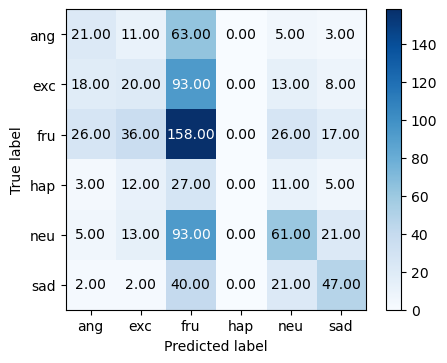

In [199]:
# Note: Only the method of drawing confusion matrix is wriiten by referring to existing methods on the Internet.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

xlabels = ["ang", "exc", "fru", "hap", "neu", "sad"]
ylabels = ["ang", "exc", "fru", "hap", "neu", "sad"]
def drawcm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)#, normalize='true')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=xlabels,
           yticklabels=ylabels,
           ylabel='True label',
           xlabel='Predicted label')

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], '.2f'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    #fig.tight_layout()
    plt.show()

drawcm(combine_yt, combine_yp)


### Confusion Matrix of using only acoustic features

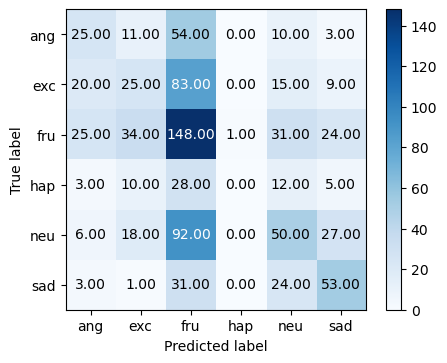

In [200]:
drawcm(audio_yt, audio_yp)


### Confusion Matrix of using only linguistic features

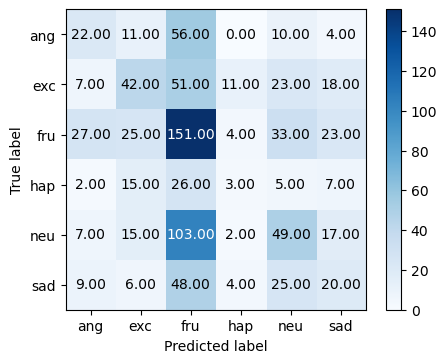

In [201]:
drawcm(txt_yt, txt_yp)